In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Loading and reading data in poython
data= pd.read_csv('C:/Users/Stevelal/Downloads/titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# CHECKING THE NULL VALUES AND HANDLING THE NULL VALUES


In [3]:
# Checking for null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Checking data informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Handling the NaN in Age using median
data['Age']=data['Age'].fillna(data['Age'].median())

# Handling the Nan in Cabin setting it as unknown
data['Cabin']= data['Cabin'].fillna('Unknown')

# Handling the NaN in Embarked using mode
data['Embarked']= data['Embarked'].fillna(data['Embarked'].mode()[0])

In [6]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
for col in data.columns:
    if data[col].dtypes == 'object':
        print(col, data[col].unique(), sep='=', flush=False)

Name=['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'T

<AxesSubplot:>

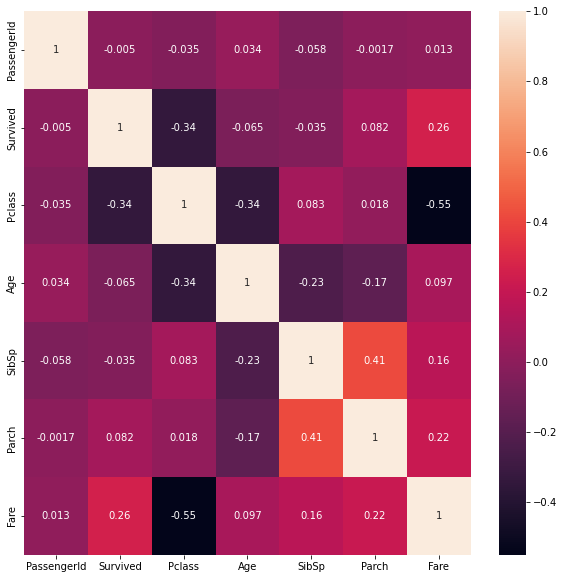

In [8]:
# Checking the correlation

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [9]:
# Label Encoding 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

a=['Sex','Embarked']
for i in np.arange(len(a)):
    data[a[i]]= le.fit_transform(data[a[i]])

In [10]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,Unknown,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,Unknown,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


In [11]:
# Feature Reduction
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [12]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [13]:
# Min-Max Scaling of the variables.

from sklearn.preprocessing import MinMaxScaler
  
scaler = MinMaxScaler()
data[["ScaledAge","ScaledFare"]] = scaler.fit_transform(data[["Age", "Fare"]])
  
print(data)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  ScaledAge  \
0           0       3    1  22.0      1      0   7.2500         2   0.271174   
1           1       1    0  38.0      1      0  71.2833         0   0.472229   
2           1       3    0  26.0      0      0   7.9250         2   0.321438   
3           1       1    0  35.0      1      0  53.1000         2   0.434531   
4           0       3    1  35.0      0      0   8.0500         2   0.434531   
..        ...     ...  ...   ...    ...    ...      ...       ...        ...   
886         0       2    1  27.0      0      0  13.0000         2   0.334004   
887         1       1    0  19.0      0      0  30.0000         2   0.233476   
888         0       3    0  28.0      1      2  23.4500         2   0.346569   
889         1       1    1  26.0      0      0  30.0000         0   0.321438   
890         0       3    1  32.0      0      0   7.7500         1   0.396833   

     ScaledFare  
0      0.014151  
1  

In [14]:
# Splitting the Data

from sklearn.model_selection import train_test_split
y= data['Survived']
x= data.drop(['Survived', 'Age','Fare'], axis=1)
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= 30,test_size= 0.2)

Applying the ML Algorithums

In [15]:
# Applying Gaussian Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score,recall_score, f1_score
Classifier= GaussianNB()
Classifier.fit(x_train, y_train)
y_pred= Classifier.predict(x_test)
y_train_pred= Classifier.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred))
print('Accuracy Score is:', accuracy_score(y_test, y_pred))
print('Recall Score is:', recall_score(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('F1 score is:', f1_score(y_test, y_pred))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred))

Training Accuracy is :  0.800561797752809
Accuracy Score is: 0.7486033519553073
Recall Score is: 0.676056338028169
Precision Score: 0.6857142857142857
F1 score is: 0.6808510638297872

 The confusion matrix is : 
 [[86 22]
 [23 48]]


In [16]:
 # Applying Bernoulli Naive Bayes Classifier
    
from sklearn.naive_bayes import BernoulliNB
classifier= BernoulliNB()
classifier.fit(x_train, y_train)
y_pred1= classifier.predict(x_test)
y_train_pred1= classifier.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred1))
print('Accuracy Score is:', accuracy_score(y_test, y_pred1))
print('Recall Score is:', recall_score(y_test, y_pred1))
print('Precision Score:', precision_score(y_test, y_pred1))
print('F1 score is:', f1_score(y_test, y_pred1))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred1))

Training Accuracy is :  0.7949438202247191
Accuracy Score is: 0.7541899441340782
Recall Score is: 0.6619718309859155
Precision Score: 0.7014925373134329
F1 score is: 0.6811594202898551

 The confusion matrix is : 
 [[88 20]
 [24 47]]


In [17]:
# Applying Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred2= dt.predict(x_test)

y_train_pred2 = dt.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred2))
print('Accuracy Score is:', accuracy_score(y_test, y_pred2))
print('Recall Score is:', recall_score(y_test, y_pred2))
print('Precision Score:', precision_score(y_test, y_pred2))
print('F1 score is:', f1_score(y_test, y_pred2))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred2))

Training Accuracy is :  0.9845505617977528
Accuracy Score is: 0.770949720670391
Recall Score is: 0.6619718309859155
Precision Score: 0.734375
F1 score is: 0.6962962962962963

 The confusion matrix is : 
 [[91 17]
 [24 47]]


In [18]:
# Applying Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred3= rf_model.predict(x_test)

y_train_pred3= rf_model.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred3))
print('Accuracy Score is:', accuracy_score(y_test, y_pred3))
print('Recall Score is:', recall_score(y_test, y_pred3))
print('Precision Score:', precision_score(y_test, y_pred3))
print('F1 score is:', f1_score(y_test, y_pred3))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred3))

Training Accuracy is :  0.9845505617977528
Accuracy Score is: 0.8044692737430168
Recall Score is: 0.6901408450704225
Precision Score: 0.7903225806451613
F1 score is: 0.7368421052631579

 The confusion matrix is : 
 [[95 13]
 [22 49]]


In [19]:
# Applying SVM Model
from sklearn import svm
from sklearn.svm import SVC

svm_linear = SVC(kernel= "linear")
svm_linear.fit(x_train,y_train)
y_pred4 = svm_linear.predict(x_test)

y_train_pred4 = svm_linear.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred4))
print('Accuracy Score is:', accuracy_score(y_test, y_pred4))
print('Recall Score is:', recall_score(y_test, y_pred4))
print('Precision Score:', precision_score(y_test, y_pred4))
print('F1 score is:', f1_score(y_test, y_pred4))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred4))

Training Accuracy is :  0.7949438202247191
Accuracy Score is: 0.7541899441340782
Recall Score is: 0.647887323943662
Precision Score: 0.7076923076923077
F1 score is: 0.676470588235294

 The confusion matrix is : 
 [[89 19]
 [25 46]]


In [20]:
# Applying KNN model

from sklearn.neighbors import KNeighborsClassifier
classifer = KNeighborsClassifier(n_neighbors=4,metric = "minkowski") 
classifer.fit(x_train,y_train)
y_pred5 = classifer.predict(x_test)

y_train_pred5 = classifer.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred5))
print('Accuracy Score is:', accuracy_score(y_test, y_pred5))
print('Recall Score is:', recall_score(y_test, y_pred5))
print('Precision Score:', precision_score(y_test, y_pred5))
print('F1 score is:', f1_score(y_test, y_pred5))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred5))

Training Accuracy is :  0.8553370786516854
Accuracy Score is: 0.8044692737430168
Recall Score is: 0.6197183098591549
Precision Score: 0.8461538461538461
F1 score is: 0.7154471544715447

 The confusion matrix is : 
 [[100   8]
 [ 27  44]]


In [21]:
# Applying Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score
log_model= LogisticRegression()
log_model.fit(x_train,y_train)
y_pred6 = log_model.predict(x_test)

y_train_pred6= log_model.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred6))
print('Accuracy Score is:', accuracy_score(y_test, y_pred6))
print('Recall Score is:', recall_score(y_test, y_pred6))
print('Precision Score:', precision_score(y_test, y_pred6))
print('F1 score is:', f1_score(y_test, y_pred6))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred6))

Training Accuracy is :  0.8033707865168539
Accuracy Score is: 0.770949720670391
Recall Score is: 0.647887323943662
Precision Score: 0.7419354838709677
F1 score is: 0.6917293233082707

 The confusion matrix is : 
 [[92 16]
 [25 46]]


The accuracy score of the various models are as follows:

Accuracy Score of Gaussian NB 0.75 is

Accuracy Score of Bernoulli NB is 0.75

Accuracy score of Logistic Regression Model is 0.77

Accuracy score of KNN Model is 0.80

Accuracy score of Linear SVM Model is, 0.75

Accuracy score of Decision Tree Model is, 0.75

Accuracy score of Random Forest Classifier Model is, 0.82

All models give overall good scores but the Random Forest Classifier and KNN Model is found to be the best among all the other models.